In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from scipy.stats import uniform, randint
df = pd.read_csv("../../data/tracks.csv")
df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [2]:
df = df.drop(columns= ['artists'], axis=1)


In [3]:
df2 =pd.read_csv("../../data/complete.csv")

In [4]:
big_df = pd.merge(df, df2, how='inner')

In [5]:
big_df["On_chart"].value_counts()

1    10538
0       42
Name: On_chart, dtype: int64

In [6]:
df3 = big_df.loc[big_df['On_chart'] != 0]

In [7]:
df3 = big_df.loc[big_df['popularity'] >= 10]

In [8]:
df3["On_chart"].value_counts()

1    10403
0       41
Name: On_chart, dtype: int64

In [9]:
df3["popularity"].median()

56.0

<AxesSubplot:xlabel='popularity'>

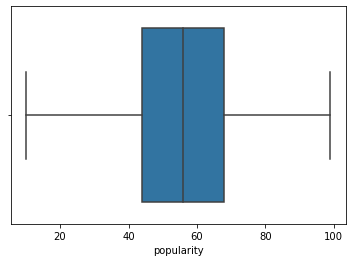

In [10]:
import seaborn as sns
sns.boxplot(df3["popularity"])

In [11]:
df["new_pop"] = [1 if p >=56 else 0 for p in df["popularity"]]
df

,id,name,popularity,duration_ms,explicit,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,new_pop
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,0
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,1
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,1
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,1


In [66]:
X = df.drop(columns=['new_pop', 'name', 'id', 'id_artists', 'release_date', 'explicit', 'popularity', 'time_signature','tempo', 'mode', 'key'], axis=1)
y = df['new_pop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [67]:
X_tr_val, X_test_val, y_tr_val, y_test_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [68]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [69]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_tr_val), columns=X.columns)

# Creating Modeling Function

In [70]:
def modeling_function(model, X_train, y_train, X_val, y_val):


    model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)


    print('Training accuracy_score: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy_score: ', accuracy_score(y_val, val_preds))
 

    return model

# Baseline Model

In [71]:
logreg1 = LogisticRegression()

In [72]:
modeling_function(logreg1, X_train_scaled, y_train, X_val_scaled, y_tr_val)

Training accuracy_score:  0.9263464522858524
Validation accuracy_score:  0.9264759489056639


LogisticRegression()

# Smote and Second Logistic Regression

In [73]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2021)

In [74]:
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

In [75]:
logreg2 = LogisticRegression()

In [76]:
modeling_function(logreg2, X_train_res, y_train_res, X_val_scaled, y_tr_val)

Training accuracy_score:  0.7028505519855001
Validation accuracy_score:  0.6640061361806832


LogisticRegression()

# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(X_train, y_train)
tree_clf.feature_importances_

# Test set predictions
pred = tree_clf.predict(X_test)
# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

[[179354      0]
 [ 14248      0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    179354
           1       0.00      0.00      0.00     14248

    accuracy                           0.93    193602
   macro avg       0.46      0.50      0.48    193602
weighted avg       0.86      0.93      0.89    193602

Testing Accuracy for Decision Tree Classifier: 92.64%


# Checking Feature Importance

In [78]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(X_train.columns.values, model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

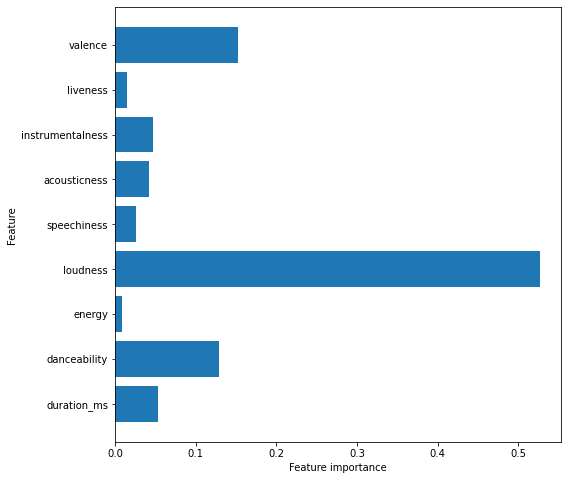

In [79]:
plot_feature_importances(tree_clf)

# Random Forest

In [80]:
rf = RandomForestClassifier(random_state=2021)

In [84]:
rf_model= modeling_function(rf, X_train_scaled, y_train, X_val_scaled, y_tr_val)

Training accuracy_score:  0.9962856488666141
Validation accuracy_score:  0.9963053813089506


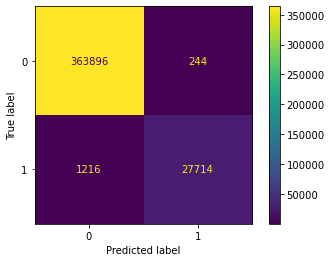

In [85]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_model, X_train_scaled, y_train)

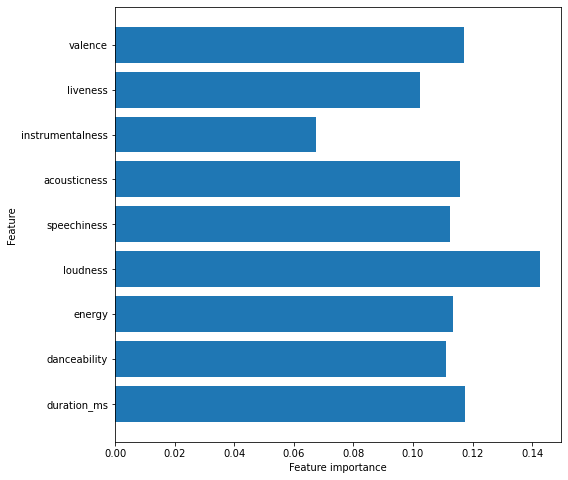

In [118]:
plot_feature_importances(rf)

# Neural Net

In [89]:

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelBinarizer

scaler = StandardScaler()

scaled_data = scaler.fit_transform(X_train, y_train)

model_1 = Sequential()
model_1.add(Dense(5, activation='tanh', input_shape=(9,)))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

results_1 = model_1.fit(scaled_data, y_train, epochs=25, batch_size=1, validation_split=0.2)

Epoch 1/25
314456/314456 [==============================] - 390s 1ms/step - loss: 0.2296 - acc: 0.9264 - val_loss: 0.2285 - val_acc: 0.9255
Epoch 2/25
314456/314456 [==============================] - 613s 2ms/step - loss: 0.2267 - acc: 0.9266 - val_loss: 0.2274 - val_acc: 0.9255
Epoch 3/25
314456/314456 [==============================] - 439s 1ms/step - loss: 0.2260 - acc: 0.9266 - val_loss: 0.2275 - val_acc: 0.9255
Epoch 4/25
314456/314456 [==============================] - 434s 1ms/step - loss: 0.2256 - acc: 0.9266 - val_loss: 0.2267 - val_acc: 0.9255
Epoch 5/25
314456/314456 [==============================] - 288s 916us/step - loss: 0.2253 - acc: 0.9266 - val_loss: 0.2270 - val_acc: 0.9255
Epoch 6/25
314456/314456 [==============================] - 350s 1ms/step - loss: 0.2251 - acc: 0.9266 - val_loss: 0.2275 - val_acc: 0.9255
Epoch 7/25
314456/314456 [==============================] - 301s 958us/step - loss: 0.2251 - acc: 0.9266 - val_loss: 0.2268 - val_acc: 0.9255
Epoch 8/25
31445

In [110]:
df4 = df.loc[df['new_pop'] != 0]

In [111]:
df4

,id,name,popularity,duration_ms,explicit,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,new_pop
8095,1LGqJ3nvxpVXDWpEzq4DJD,All of Me,65,181440,0,['1YzCsTRb22dQkh9lghPIrp'],1933,0.504,0.0644,2,-14.754,0,0.0408,0.972,0.000004,0.1740,0.4030,106.994,5,1
15951,0AtVA7axXKVFnjQsN4xBIy,Dream,56,168158,0,['5o8E07TcYqIefZpDejymAd'],1942-06-20,0.198,0.2760,7,-10.588,1,0.0289,0.919,0.002610,0.2100,0.0692,88.422,3,1
15952,4so0Wek9Ig1p6CRCHuINwW,White Christmas,56,177480,0,"['6ZjFtWeHP9XN7FeKSUe80S', '69UfPJgUmFFAVT740q...",1942-01-01,0.317,0.1580,9,-16.485,1,0.0381,0.673,0.353000,0.3380,0.2470,130.503,3,1
18549,0qB213IfGN0JXXm9aRjldF,Again (with The Mellomen),61,167907,0,"['3ESG6pj6a0LvUKklENalT6', '548L4DXlt7N14Mhbfd...",1945,0.495,0.0209,3,-21.329,1,0.0348,0.981,0.000001,0.0753,0.1450,62.588,4,1
21549,6yhLR2sVn1IfsScVrR4ocr,"Whatever Will Be, Will Be (Que Sera, Sera) (wi...",62,123360,0,"['3ESG6pj6a0LvUKklENalT6', '2N0Yx2ISFxGV0yt7xf...",1948,0.416,0.3410,9,-10.749,1,0.0391,0.864,0.000000,0.7240,0.7760,177.229,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586662,4Zp3rm12p5PiHToYJflmyy,Meet Again,57,273587,0,['1lFLniFTaPjYCtQZvDXpqu'],2020-12-20,0.476,0.4400,3,-8.508,1,0.0488,0.679,0.000000,0.0926,0.2410,135.814,4,1
586665,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,['4MxqhahGRT4BPz1PilXGeu'],2020-03-20,0.562,0.0331,1,-25.551,1,0.1030,0.996,0.961000,0.1110,0.3860,63.696,3,1
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,1
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,1


In [114]:
df4["loudness"].median()

-6.505

In [115]:
df4["duration_ms"].median()

216751.0

In [116]:
df4["valence"].median()

0.529

In [119]:
from sklearn.inspection import permutation_importance

In [137]:
results = permutation_importance(logreg1, X_train_scaled, y_train)

In [139]:
results.importances

array([[ 5.08815224e-05,  1.01763045e-05,  3.56170657e-05,
        -1.27203806e-05, -1.01763045e-05],
       [ 9.15867403e-05,  9.66748925e-05,  1.01763045e-04,
         1.62820872e-04,  9.41308164e-05],
       [ 6.61459791e-04,  7.55590607e-04,  7.32693922e-04,
         7.25061694e-04,  7.30149846e-04],
       [ 3.96875875e-04,  2.64583916e-04,  3.51082504e-04,
         3.68891037e-04,  3.63802885e-04],
       [ 1.27203806e-05,  1.52644567e-05, -2.54407612e-06,
         1.01763045e-05,  1.27203806e-05],
       [-1.27203806e-05,  0.00000000e+00, -1.27203806e-05,
        -2.28966851e-05,  1.01763045e-05],
       [-7.63222836e-06, -2.54407612e-06, -2.03526090e-05,
        -2.54407612e-06, -1.27203806e-05],
       [-1.01763045e-05, -1.27203806e-05, -2.28966851e-05,
         0.00000000e+00,  2.54407612e-06],
       [ 4.83374463e-04,  4.85918539e-04,  4.35037016e-04,
         3.81611418e-04,  4.75742234e-04]])

In [142]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

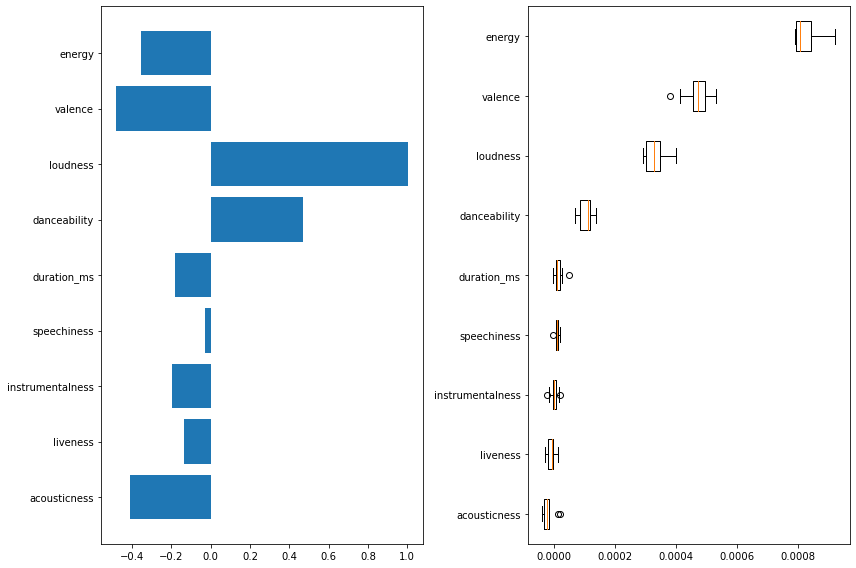

In [183]:
result = permutation_importance(logreg1, X_train_scaled, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()


fig, ax = plt.subplots(1, 2, figsize=(12,8))

ax[0].barh(X_train_scaled.columns[perm_sorted_idx], logreg1.coef_[0][perm_sorted_idx])

ax[1].boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_train_scaled.columns[perm_sorted_idx])
fig.tight_layout()
plt.show()

In [184]:
df4["energy"].median()

0.662

In [189]:
data = pd.read_csv("../../data/data_o.csv")
data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [190]:
data = data.loc[data['year'] >= 1960]

In [192]:
Average_year = data[['loudness','valence','acousticness','danceability','energy','instrumentalness', 'liveness', 'loudness','speechiness','tempo','year']].groupby('year').mean().sort_values('year').reset_index()

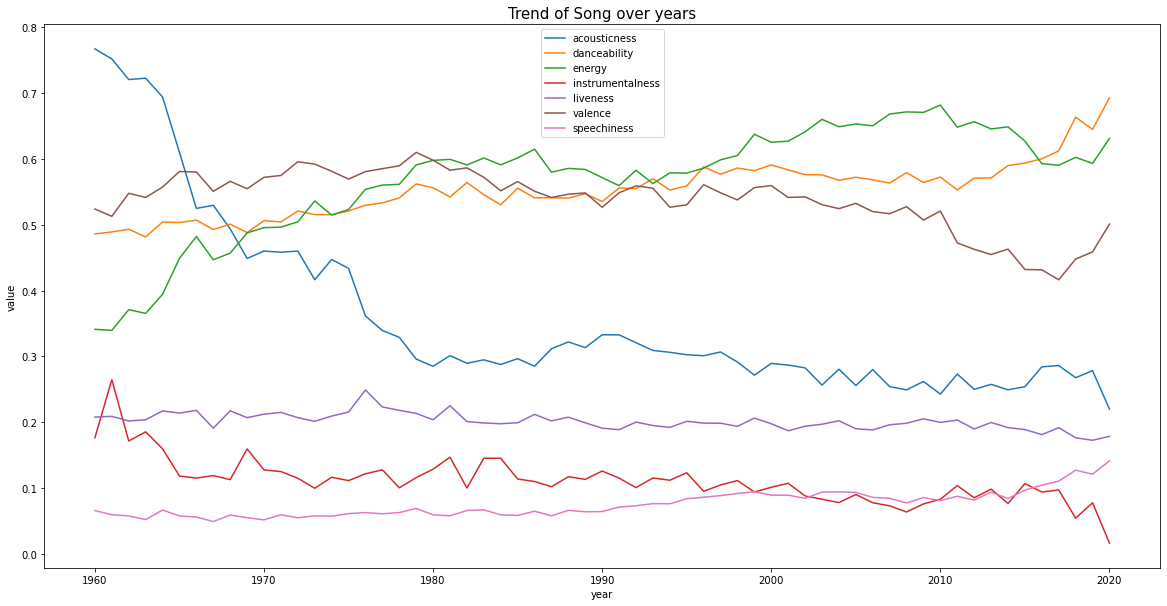

In [193]:
plt.figure(figsize=(20,10))
plt.title('Trend of Song over years',fontsize=15)
lines = ['acousticness','danceability','energy','instrumentalness','liveness','valence','speechiness']
for i in lines:
    sns.lineplot(x='year', y=i, data=Average_year)
plt.ylabel('value')
plt.legend(lines)